In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
import tensorflow.keras
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import RMSprop

font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
np.random.seed(7)
data=np.genfromtxt("d:/data/regression/x09.txt", skip_header=36) # 데이터 로딩, 시작 36행 건너뜀
data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

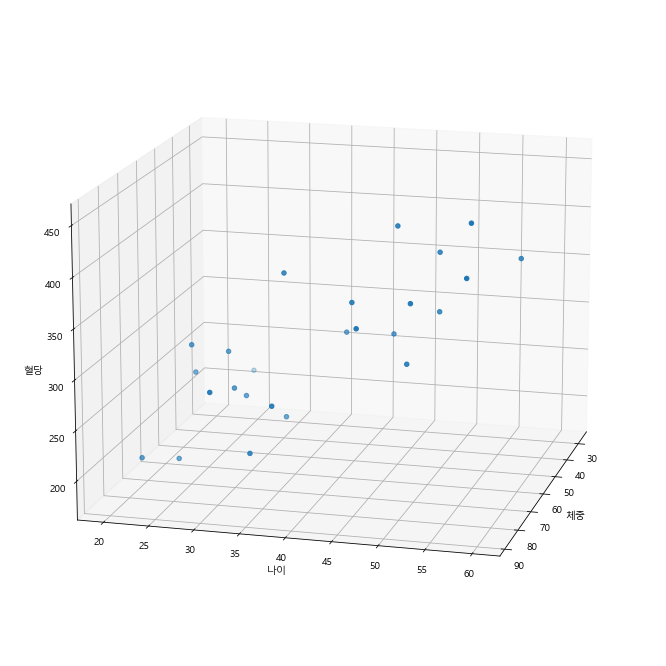

In [3]:
from mpl_toolkits.mplot3d import Axes3D

xdata=np.array(data[:,2],dtype=np.float32)
ydata=np.array(data[:,3],dtype=np.float32)
zdata=np.array(data[:,4],dtype=np.float32)
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel('체중')
ax.set_ylabel('나이')
ax.set_zlabel('혈당')
ax.view_init(15,15)
plt.show()

In [4]:
# 데이터를 keras에 맞게 변환
x_data=np.array(data[:,2:4], dtype=np.float32) # 독립변수
y_data=np.array(data[:,4], dtype=np.float32) # 종속변수
# 회귀분석 모델 생성
model=Sequential()
model.add(Dense(1,input_shape=(2,)))
# 손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수
# 손실함수의 결과값을 가장 작게 만드는 것이 신경망 학습의 목표
# 손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 학습 과정이다
# 평균제곱오차(Mean Squared Error, MSE) : 회귀분석에서 많이 사용하는 손실함수
rmsprop=RMSprop(learning_rate=0.01) # 학습률 0.01
model.compile(loss='mse', optimizer=rmsprop)

In [5]:
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 43119.1367
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 41732.0312
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 40749.2539
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 39940.1992
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 39232.0742
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 38591.2305
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 37998.9258
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 37443.5547
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 36917.3516
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 36414.8281
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 35931.9688
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 35465.7344
Ep

In [6]:
print(hist.history.keys())

dict_keys(['loss'])


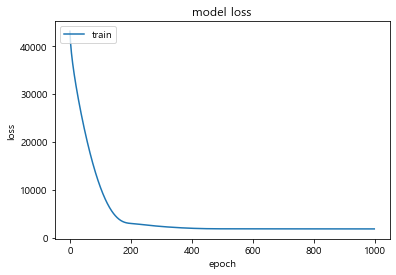

In [7]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [8]:
# 새로운 데이터로 예측
model.predict(np.array([100,40]).reshape(1,2)) # 체중 100kg, 40세
# 1차원 배열을 1행 2열의 2차원 배열로 변환

array([[350.5152]], dtype=float32)

In [9]:
model.predict(np.array([60,25]).reshape(1,2)) # 체중 60kg, 25세

array([[219.60582]], dtype=float32)

In [10]:
# 회귀선을 그리기 위한 작업
w,b=model.get_weights() # 가중치와 절편(=편향, bias)
w,b

(array([[1.1939303],
        [5.5434775]], dtype=float32),
 array([9.383061], dtype=float32))

In [11]:
x=np.linspace(20,100,50).reshape(50,1)
y=np.linspace(10,70,50).reshape(50,1)
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# → start부터 stop까지의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수
x2=np.concatenate((x,y), axis=1)
z=np.matmul(x2,w)+b # 행렬 곱셈

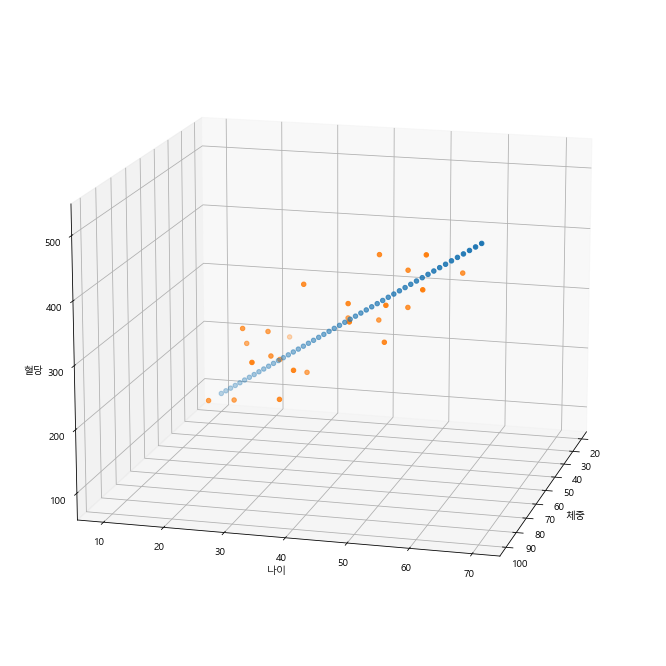

In [12]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z) # 회귀선
# 산점도
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel('체중')
ax.set_ylabel('나이')
ax.set_zlabel('혈당')
ax.view_init(15,15)
plt.show()